In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geologist/dataset_geologist.xlsx


In [57]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Data intro

In [58]:
path = '/kaggle/input/geologist/dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [59]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [60]:
data.columns = new_col_names

In [61]:
data.head()

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [62]:
data.shape

(514, 21)

In [63]:
data.dtypes

num                                 int64
Field_name                         object
Reservoir_unit                     object
Country                            object
Region                             object
Basin_name                         object
Tectonic_regime                    object
Latitude                          float64
Longitude                         float64
Operator_company                   object
Onshore_or_offshore                object
Hydrocarbon_type_(main)            object
Reservoir_status_(current)         object
Structural_setting                 object
Depth_(top_reservoir_ft_TVD)        int64
Reservoir_period                   object
Lithology_(main)                   object
Thickness_(gross_average_ft)      float64
Thickness_(net_pay_average_ft)    float64
Porosity_(matrix_average_%)       float64
Permeability_(air_average_mD)     float64
dtype: object

In [64]:
data.isna().sum()

num                                0
Field_name                         0
Reservoir_unit                     0
Country                            0
Region                             0
Basin_name                         0
Tectonic_regime                   72
Latitude                           0
Longitude                          0
Operator_company                   0
Onshore_or_offshore                0
Hydrocarbon_type_(main)            0
Reservoir_status_(current)         0
Structural_setting                 0
Depth_(top_reservoir_ft_TVD)       0
Reservoir_period                   0
Lithology_(main)                   0
Thickness_(gross_average_ft)       0
Thickness_(net_pay_average_ft)     0
Porosity_(matrix_average_%)       72
Permeability_(air_average_mD)      0
dtype: int64

In [65]:
df = data.copy()

In [66]:
df.drop('num', inplace=True, axis=1)

**targets: Tectonic_regime, Porosity_(matrix_average_%)**

## Numerical columns

In [67]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(514, 8)

In [68]:
num_cols.describe()

,num,Latitude,Longitude,Depth_(top_reservoir_ft_TVD),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,442.000000,514.000000
mean,537.642023,35.095555,-8.997048,6707.280156,783.678988,190.771751,17.929955,464.760239
std,314.239936,22.121078,88.163502,3613.719746,1424.953719,271.926665,7.554253,1001.308403
min,6.000000,-38.522100,-151.615300,220.000000,11.000000,0.000000,1.100000,0.001000
25%,263.250000,28.124825,-102.403650,3909.750000,140.000000,43.250000,12.000000,10.000000
50%,529.000000,37.810400,2.212100,6393.500000,328.000000,101.000000,17.900000,83.000000
75%,812.750000,51.285650,57.318375,9116.250000,753.750000,225.000000,24.000000,400.000000
max,1071.000000,76.446200,150.210000,19888.000000,12500.000000,2976.000000,55.000000,7500.000000


## Geospatial data visualization

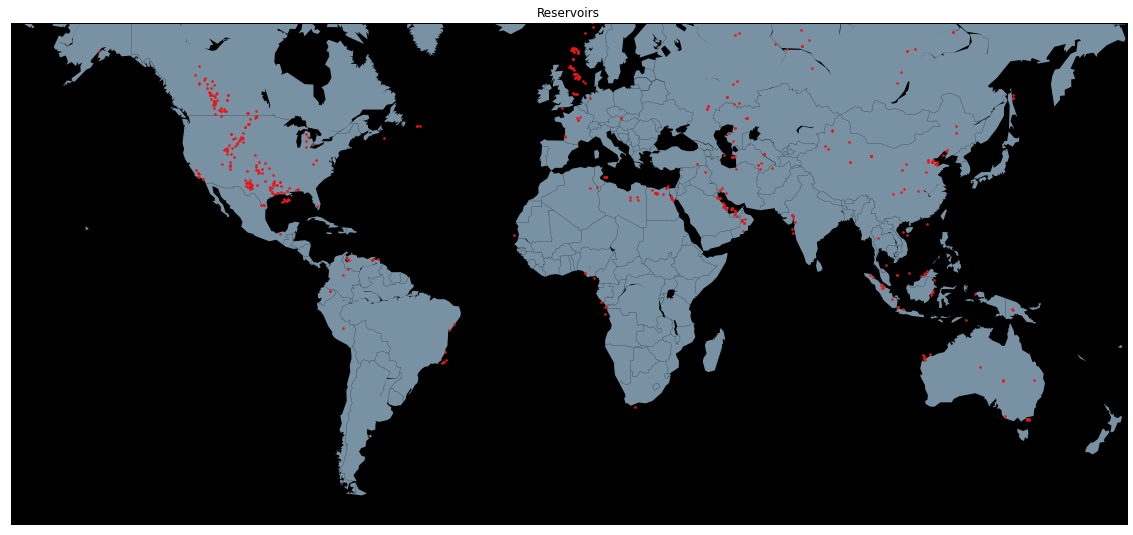

In [69]:
plt.figure(1, figsize=(20,12))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#7892A4',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="#000000")              # thin white line for country borders

# Plot the data
mxy = m1(data["Longitude"].tolist(), data["Latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=7, c="#E6171A", lw=0, alpha=1, zorder=5)

plt.title("Reservoirs")
plt.show()

## Categorical columns

In [70]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,JURASSIC,LIMESTONE
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,CRETACEOUS,SANDSTONE
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,THINLY-BEDDED SANDSTONE
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,NEOGENE,SANDSTONE
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,CRETACEOUS,LIMESTONE


In [71]:
cat_cols.shape

(514, 13)

In [72]:
cat_cols.describe()

,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Operator_company,Onshore_or_offshore,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Reservoir_period,Lithology_(main)
count,514,514,514,514,514,442,514,514,514,514,514,514,514
unique,440,409,51,7,121,9,200,3,6,14,12,15,17
top,ZAOYUAN,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,CRETACEOUS,SANDSTONE
freq,5,10,143,200,47,214,45,356,390,158,142,147,291


In [73]:
cat_cols = cat_cols.fillna('NA')

### Try label encoding

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head()  

## Scatterplots with targets

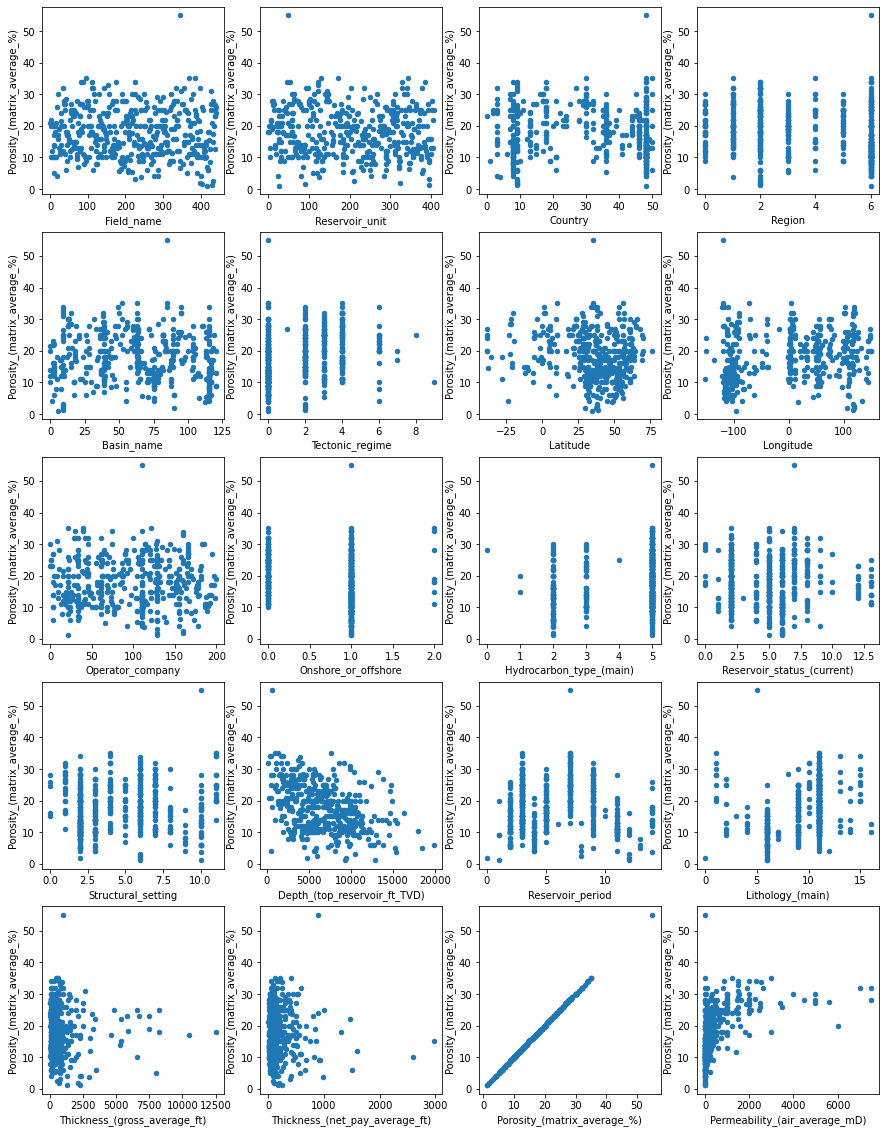

In [76]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Porosity_(matrix_average_%)", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

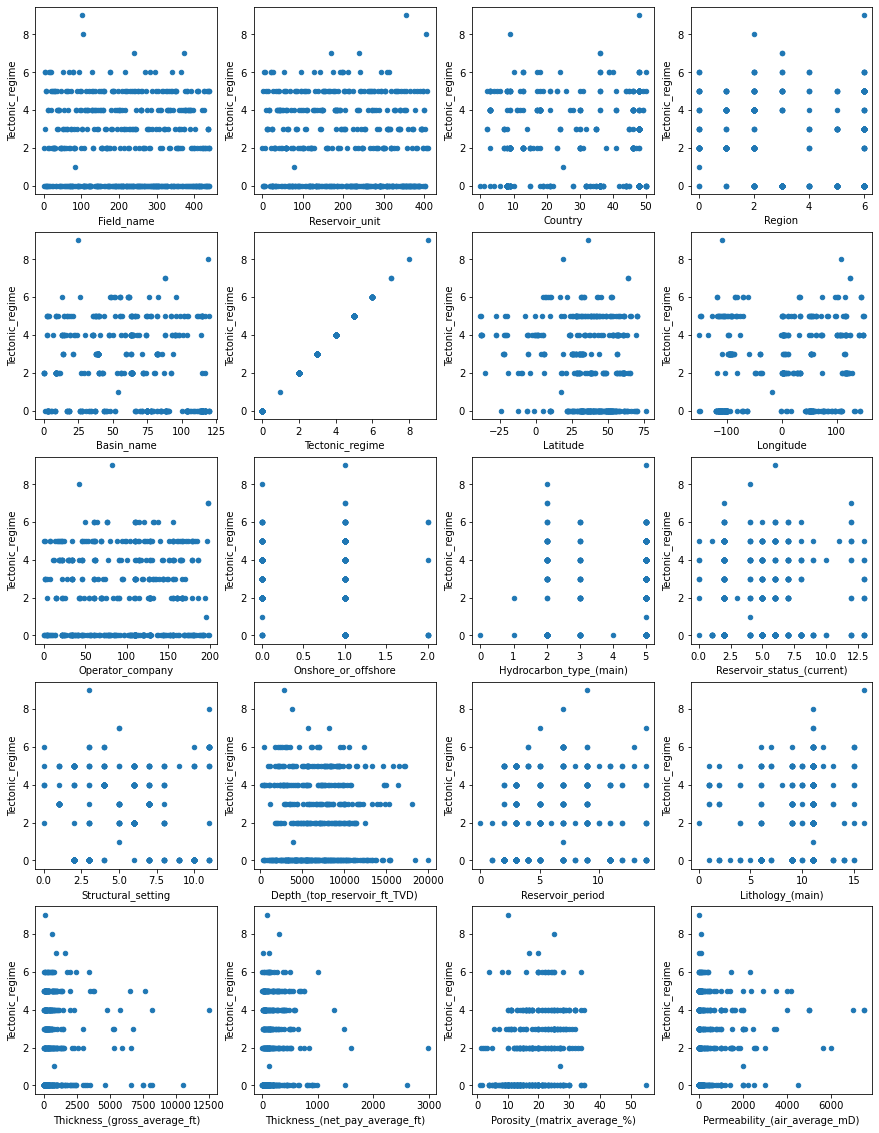

In [77]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Tectonic_regime", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## Outliers

In [78]:
num_cols.columns[2:]

Index(['Longitude', 'Depth_(top_reservoir_ft_TVD)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)',
       'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)'],
      dtype='object')

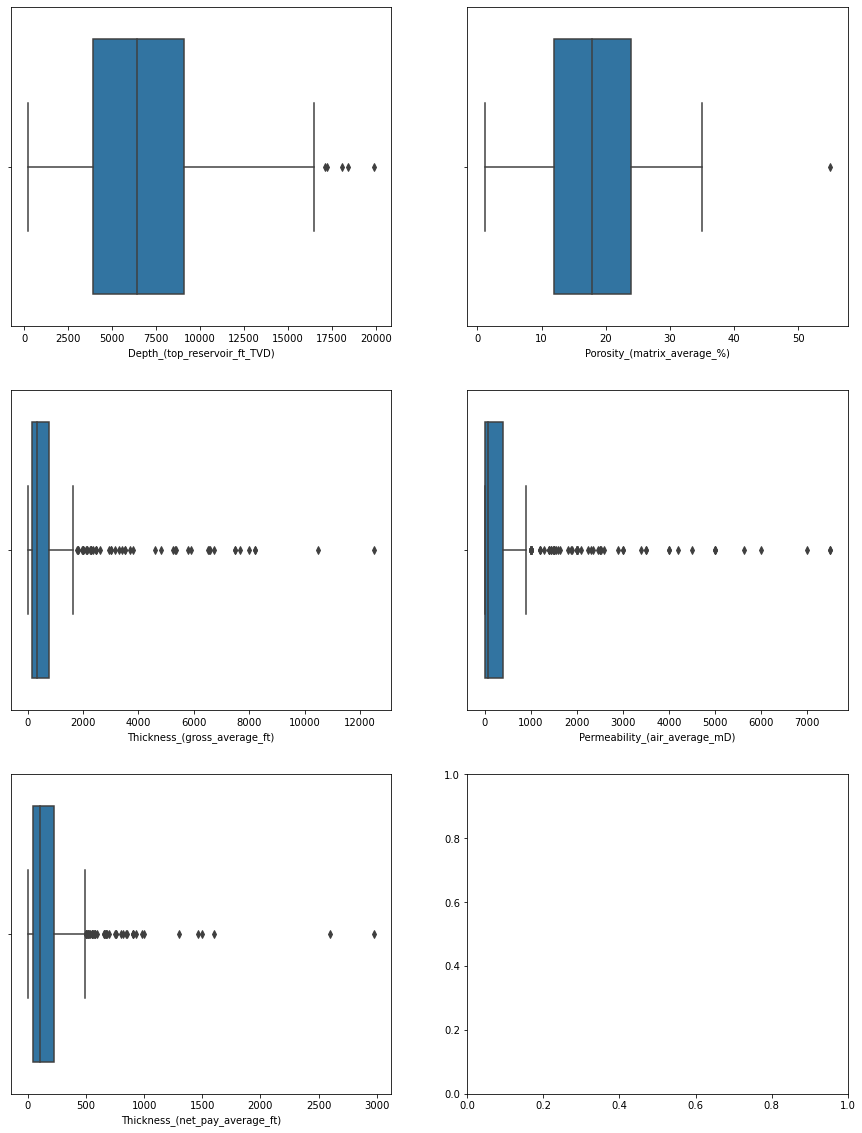

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
count = 0
for idx, feature in enumerate(num_cols.columns[3:]):
    sns.boxplot(x=df[feature], ax=axes[count % 3, count // 3])
    count += 1

In [80]:
for col in num_cols.columns[3:]:    
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for Depth_(top_reservoir_ft_TVD) column: [17250 18050 19888 18425 17132]

Outliers for Thickness_(gross_average_ft) column: [ 8000.  2100.  3000.  3400.  8200.  2000.  4600.  7500. 10500.  8200.
  6500.  2000.  1800.  3281.  2300.  7500. 12500.  3700.  3500.  6600.
  5800.  5350.  3500.  2133.  2953.  2460.  5335.  2300.  2460.  2300.
  2000.  2000.  3000.  7680.  1800.  3800.  6739.  1772.  1970.  3150.
  5249.  5900.  2350.  2133.  6562.  2250.  4800.  2460.  2615.]

Outliers for Thickness_(net_pay_average_ft) column: [ 575.  512.  816.  500.  840.  570.  500.  672.  650.  550.  580.  590.
  850.  755.  800.  900.  525.  675. 1300.  518.  679. 2600.  660. 1466.
 1500.  928.  984. 2976.  563.  650. 1000.  750. 1600.  548.  902.  520.
  500.  760.  700.  900.  535.  550.  500.]

Outliers for Porosity_(matrix_average_%) column: []

Outliers for Permeability_(air_average_mD) column: [3500. 3000. 5000. 5000. 1000. 2250. 1500. 2900. 1000. 1450. 1000. 1000.
 1000. 2529. 2000. 2500.

### Distibutions of num features

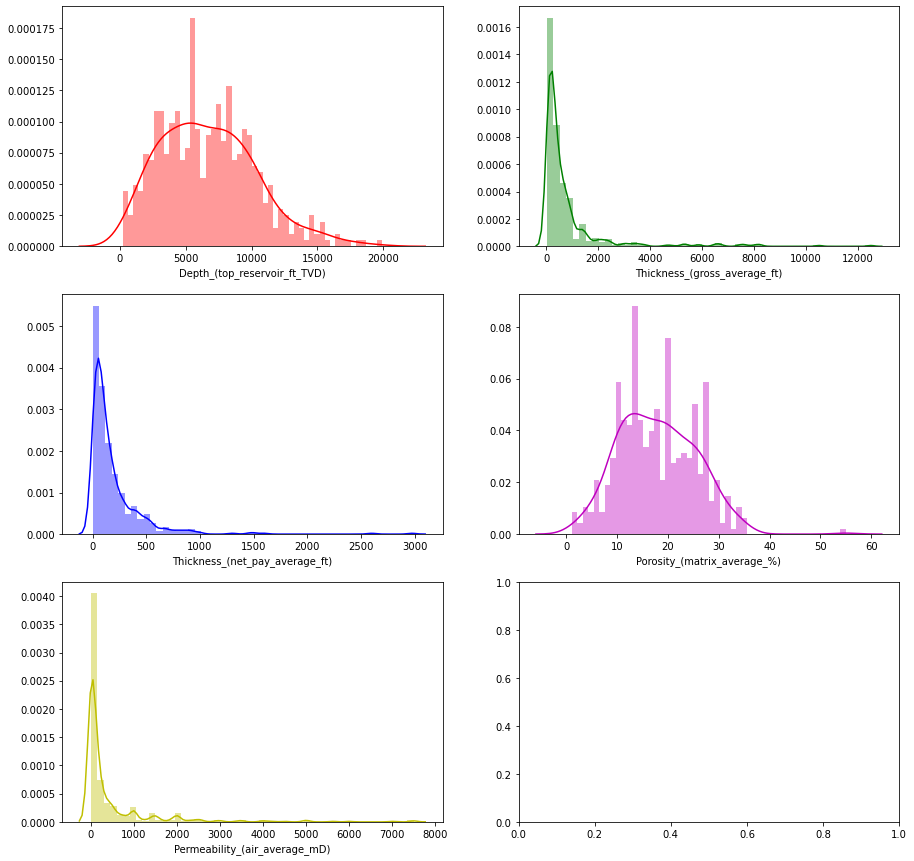

In [81]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['Depth_(top_reservoir_ft_TVD)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Thickness_(gross_average_ft)'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Thickness_(net_pay_average_ft)'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Porosity_(matrix_average_%)'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Permeability_(air_average_mD)'], bins=50, color='y', ax=axes[2, 0])

### Strange porosity case

In [82]:
data[data['Porosity_(matrix_average_%)'] > 50]

,num,Field_name,Reservoir_unit,Country,Region,Basin_name,Tectonic_regime,Latitude,Longitude,Operator_company,...,Hydrocarbon_type_(main),Reservoir_status_(current),Structural_setting,Depth_(top_reservoir_ft_TVD),Reservoir_period,Lithology_(main),Thickness_(gross_average_ft),Thickness_(net_pay_average_ft),Porosity_(matrix_average_%),Permeability_(air_average_mD)
401,861,SOUTH BELRIDGE,BELRIDGE DIATOMITE (MONTEREY-ETCHEGOIN),USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION,35.4368,-119.6788,NUMEROUS,...,OIL,PLATEAU PRODUCTION,THRUST,600,NEOGENE,DIATOMITE,1000.0,900.0,55.0,1.5


### Correlation matrix

In [83]:
import seaborn as sns

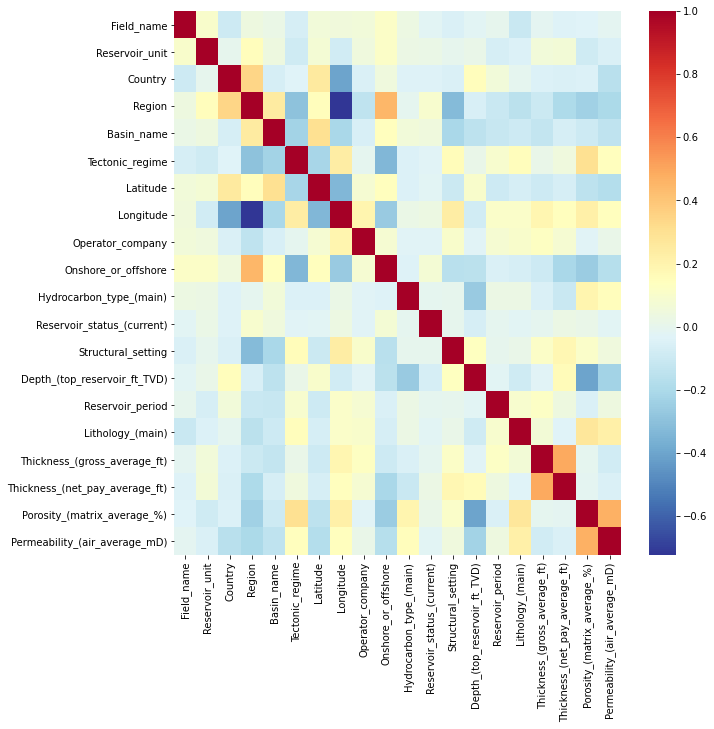

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="RdYlBu_r");

### PCA(n_components=3)

Label encoded data store in df

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)
df.head()

In [ ]:
df_without_na = df.dropna()
df_without_na.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model = PCA(n_components=3)
model.fit(df_without_na)
df_pca_3 = model.transform(df_without_na)

In [ ]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

In [ ]:
draw_3d(df_pca_3)

There are some distant points

### OHE and further PCA

In [ ]:
cat_cols = cat_cols.drop('Tectonic_regime', axis=1)
dummy_df = pd.get_dummies(cat_cols)
dummy_df.head()

In [ ]:
num_cols.head()

In [ ]:
ohe_df = pd.concat([dummy_df, data.select_dtypes(exclude='object')], axis=1)
ohe_df.shape

In [ ]:
ohe_df_without_na = ohe_df.dropna()
ohe_df_without_na.shape

In [ ]:
model = PCA(n_components=3)
model.fit(ohe_df_without_na)
ohe_df_pca_3 = model.transform(ohe_df_without_na)

In [ ]:
draw_3d(ohe_df_pca_3)